In [1]:
import numpy as np
import pandas as pd
import sklearn
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
import os
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
dataPath = os.path.abspath('.') + '//dataSourceCsv'

In [3]:
train = pd.read_csv(dataPath + '//changedDataSource.csv', sep = ',')
target = pd.read_csv(dataPath + '//changedTarget.csv', sep = ',')

In [7]:
train.head()

,ID,Medication:Vital-D Rx,Medication:Vitalets,Medication:Vitalets Childrens,Vital: BMI-latest,Vital: BMI Percentile-latest,Vital: Fundal Ht-latest,Vital: HC-latest,Vital: HC Percentile-latest,Vital: Ht-latest,...,Vital: Wt for Length ZScore-latest,Vital: Wt for Length ZScore-gain0to3,Vital: Wt for Length ZScore-gain1to5,Vital: Wt for Length ZScore-gain3to7,Vital: Wt for Length ZScore-gain5to10,Vital: Wt for Length ZScore-gain7to13,Vital: Wt for Length ZScore-gain10to16,Vital: Wt for Length ZScore-gain13to19,Vital: Wt for Length ZScore-gain16to24,Vital: Wt for Length ZScore-gain0to24
0,1044321,0.0,0.0,0.0,16.31,0.0,0.0,46.5,0.0,82.55,...,0.183411,0.0,0.0,0.0,0.0,0.0,0.0,0.046193,0.17343,0.183411
1,1112925,0.0,0.0,0.0,16.16,0.0,0.0,0.0,0.0,85.09,...,0.189348,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.189348
2,1115443,0.0,0.0,0.0,17.90,0.0,0.0,50.0,0.0,91.44,...,1.659064,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.659064
3,1115626,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
4,1116372,0.0,0.0,0.0,20.61,0.0,0.0,51.0,0.0,91.44,...,3.293363,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,3.293363


In [8]:
target.head()

,ID,target_0,target_1,target_2,target_3,target_4,target_5
0,1044321,0.0,1.0,0.0,0.0,0.0,0.0
1,1112925,0.0,1.0,0.0,0.0,0.0,0.0
2,1115443,0.0,1.0,0.0,0.0,0.0,0.0
3,1115626,0.0,0.0,1.0,0.0,0.0,0.0
4,1116372,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
columns = {}
columns['predictors'] = [x for x in train.columns if x != 'ID']
columns['ID'] = ['ID']
columns['label'] = ['target_3']

In [5]:
np.random.state = 100

In [6]:
allIndex = list(range(train.shape[0]))
np.random.shuffle(allIndex)

In [7]:
trainIndex = allIndex[:int(len(allIndex)*0.8)]
valIndex = allIndex[int(len(allIndex)*0.8):]

In [9]:
girl_ind = [i for i in allIndex if train.loc[i, 'Gender'] == 1]
boy_ind = [i for i in allIndex if train.loc[i, 'Gender'] == 0]
girl_train = girl_ind[:int(len(girl_ind)*0.8)]
girl_val = girl_ind[int(len(girl_ind)*0.8):]
boy_train = boy_ind[:int(len(boy_ind)*0.8)]
boy_val = boy_ind[int(len(boy_ind)*0.8):]

In [8]:
train_lgbset = lgb.Dataset(train.loc[girl_train, columns['predictors']], \
                        label=target.loc[girl_train, columns['label']], \
                        feature_name=columns['predictors'], \
                        categorical_feature=[],\
                        free_raw_data=False)

val_lgbset = lgb.Dataset(train.loc[girl_val, columns['predictors']], \
                        label=target.loc[girl_val, columns['label']], \
                        feature_name=columns['predictors'], \
                        categorical_feature=[],\
                        free_raw_data=False)

In [10]:
params = defaultdict(dict)
params['lightGBM'] = defaultdict(dict)

In [69]:
params['lightGBM']['1'] = {'learning_rate': 0.01,
 'objective': 'binary',
 'max_depth': 8,
 'min_child_samples': 50,
 'max_bin': 100,
 'subsample': 0.8,
 'subsample_freq': 1,
 'subsample_for_bin': 20000,
 'colsample_bytree': 0.632,
 'min_child_weight': 19,
 'scale_pos_weight': 99,
 'is_unbalanced': True,
 'metric': 'accuracy'}

In [12]:
params['lightGBM']['2'] = {'learning_rate': 0.01, 
                            "objective": "binary", 
                            'max_depth': 6,  
                            'min_child_samples': 50, 
                            'max_bin': 100,  
                            'subsample': 0.8,  
                            'subsample_freq': 1,  
                            'subsample_for_bin': 2000,  
                            'colsample_bytree': 0.632,  
                            'min_child_weight': 19,  
                            'scale_pos_weight':99, 
                            'is_unbalanced': True,
                            'metric': 'accuracy'
                            }

In [13]:
setts = defaultdict(dict)
setts['lightGBM'] = defaultdict(dict)
setts['lightGBM']['1'] = {'valid_names': ['train', 'valid'],
                            'evals_results': {},
                            'early_stopping_rounds': 100,
                            'num_boost_round': 1000,
                            'verbose_eval': 10,
                            'feval': None,
                            'learning_rates': lambda iter: 0.0002
                            # 'learning_rates': lambda iter: \
                            # np.log10(max(2,10002-iter))/400
                            }

In [59]:
train_lgbset = lgb.Dataset(train.loc[boy_train, columns['predictors']], \
                        label=target.loc[boy_train, columns['label']], \
                        feature_name=columns['predictors'], \
                        categorical_feature=[],\
                        free_raw_data=False)

val_lgbset = lgb.Dataset(train.loc[boy_val, columns['predictors']], \
                        label=target.loc[boy_val, columns['label']], \
                        feature_name=columns['predictors'], \
                        categorical_feature=[],\
                        free_raw_data=False)

In [69]:
gbm4 = lgb.train(params['lightGBM']['3'], 
                train_lgbset, 
                valid_sets=[train_lgbset,val_lgbset],
                valid_names=setts['lightGBM']['1']['valid_names'],
                #evals_results=setts['lightGBM']['1']['evals_results'],
                num_boost_round=setts['lightGBM']['1']['num_boost_round'],
                verbose_eval=setts['lightGBM']['1']['verbose_eval'],
                feval=setts['lightGBM']['1']['feval'],
                learning_rates=setts['lightGBM']['1']['learning_rates'])

In [65]:
val_pred2 = gbm2.predict(train.loc[valIndex, columns['predictors']])

In [70]:
fpr1, tpr1, threshold1 = roc_curve(target1.loc[boy_val, columns['label']].values, val_pred2, pos_label = 1)
auc(fpr, tpr)

0.80593074239483076

In [71]:
val_pred3 = gbm3.predict(train.loc[valIndex, columns['predictors']])
fpr, tpr, threshold = roc_curve(target.loc[valIndex, columns['label']].values, val_pred3, pos_label = 1)
auc(fpr, tpr)

0.74691017435444707

In [88]:
val_pred3 = gbm3.predict(train.loc[valIndex, columns['predictors']])
fpr, tpr, threshold = roc_curve(target.loc[valIndex, columns['label']].values, val_pred3, pos_label = 1)
auc(fpr, tpr)

0.86374229128545843

In [41]:
%matplotlib inline

Text(0.5,1,'ROC of LightGBM, Girls')

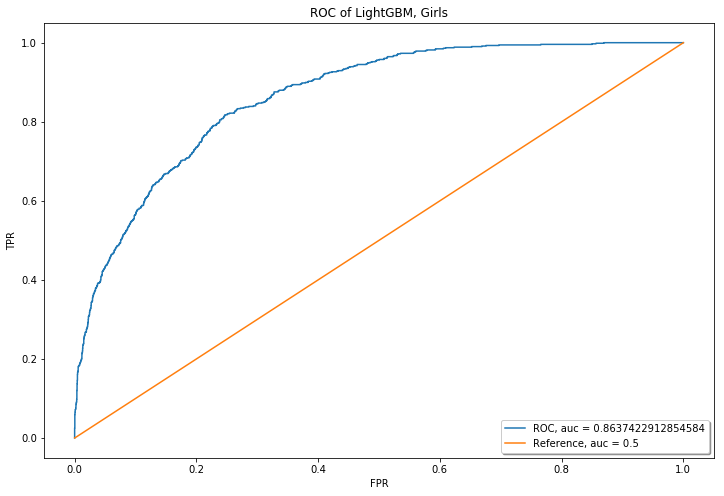

In [60]:
lines = {}
fig, ax = plt.subplots(figsize = (12,8))
lines['roc'], = ax.plot(fpr, tpr, label="ROC, auc = {}".format(auc(fpr, tpr)))
lines['ref'], = ax.plot(np.arange(0,1.01,0.01), np.arange(0,1.01,0.01), label="Reference, auc = {}".format(0.5))
legend = ax.legend(loc='lower right', shadow=True)
ax.set_xlabel("FPR")
ax.set_ylabel('TPR')
ax.set_title('ROC of LightGBM, Girls')

Text(0.5,1,'ROC of LightGBM, Boys')

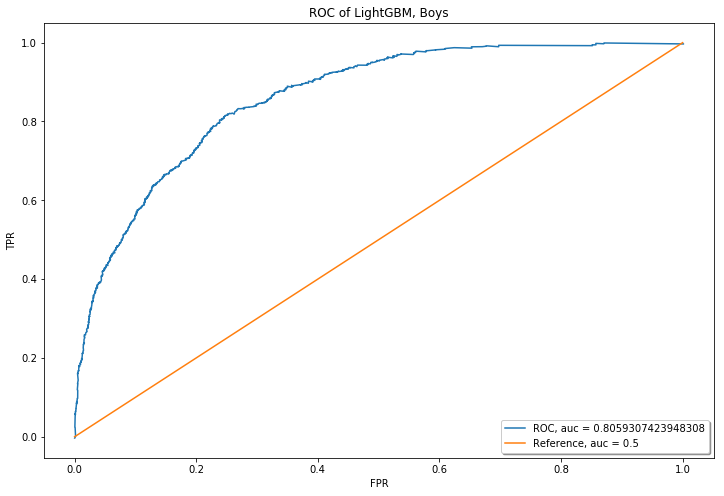

In [101]:
lines = {}
fig, ax = plt.subplots(figsize = (12,8))
lines['roc'], = ax.plot(fpr1, tpr1, label="ROC, auc = {}".format(auc(fpr1, tpr1)))
lines['ref'], = ax.plot(np.arange(0,1.01,0.01), np.arange(0,1.01,0.01), label="Reference, auc = {}".format(0.5))
legend = ax.legend(loc='lower right', shadow=True)
ax.set_xlabel("FPR")
ax.set_ylabel('TPR')
ax.set_title('ROC of LightGBM, Boys')

In [61]:
val_pred3 = gbm3.predict(train.loc[valIndex, columns['predictors']])

In [62]:
val_pred3

array([ 0.29579722,  0.19269333,  0.31951828,  0.30488702,  0.26665553,
        0.2316242 ,  0.31024595,  0.32833972,  0.33009519,  0.32914974,
        0.29645785,  0.31911927,  0.31074878,  0.20488056,  0.30947445,
        0.32847994,  0.31065786,  0.30760814,  0.27073849,  0.32932708,
        0.29954082,  0.32895567,  0.2406563 ,  0.24718477,  0.24661883,
        0.32340071,  0.31390367,  0.32627154,  0.29842645,  0.18879479,
        0.29947207,  0.25639985,  0.32450557,  0.32535303,  0.22098877,
        0.20363398,  0.32296447,  0.3070049 ,  0.3225097 ,  0.31796087,
        0.21584771,  0.33047302,  0.3023804 ,  0.32138112,  0.32749195,
        0.23203403,  0.32434263,  0.2645247 ,  0.27831965,  0.32421993,
        0.32974625,  0.31391254,  0.29709827,  0.32924232,  0.23073005,
        0.32707216,  0.26445145,  0.27209203,  0.28832823,  0.31377991,
        0.26254792,  0.32908828,  0.22257391,  0.28287093,  0.32562488,
        0.3266683 ,  0.19467577,  0.32275508,  0.21916038,  0.32

In [87]:
val_pred3_res = [1 if val_pred3[i]>=0.328 else 0 for i in range(len(val_pred3))]

In [88]:
val_pred3_res

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [89]:
tgt3 = target.loc[valIndex, columns['label']].values.transpose().squeeze(0)

In [90]:
acc3 = np.mean([1 if val_pred3_res[i] == tgt3[i] else 0 for i in range(len(val_pred3))])

In [91]:
acc3

0.83919597989949746

In [96]:
fiTable = pd.DataFrame(np.array(gbm3.feature_importance(importance_type='gain', iteration=None).reshape((1,478))), columns = columns['predictors'])

In [100]:
fiTable.sort_values(by=0, axis=1, ascending = False, inplace=True)

In [101]:
fiTable

,Vital: Wt for Length Zscore-avg10to13,Vital: BMI-latest,Vital: Wt for Length ZScore-latest,Vital: Wt for Length ZScore-avg16to19,Vital: Wt-latest,Vital: Wt for Length ZScore-avg19to24,Vital: Wt for Length ZScore-gain0to24,Vital: Temp-avg16to19,Vital: HC-avg7to10,Vital: Wt for Length ZScore-gain7to13,...,Maternal Vital: HC-thirdTrimester,Maternal Vital: HC Percentile-thirdTrimester,Maternal Vital: Ht-thirdTrimester,Maternal Vital: Ht Percentile-thirdTrimester,Maternal Vital: Pre-gravid Wt-thirdTrimester,Maternal Vital: Wt-thirdTrimester,Maternal Vital: Wt Change-thirdTrimester,Maternal Vital: Wt Percentile-thirdTrimester,Maternal Vital: Wt for Len Percentile-secondTrimester,Vital: Fundal Ht-avg5to7
0,156279.810496,124544.182616,100607.995813,68457.611843,42627.585138,39115.640807,37417.554702,30670.029349,30418.834031,27572.909478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
gbm4 = lgb.train(params['lightGBM']['2'], 
                train_lgbset, 
                valid_sets=[train_lgbset,val_lgbset],
                valid_names=setts['lightGBM']['1']['valid_names'],
                #evals_results=setts['lightGBM']['1']['evals_results'],
                num_boost_round=setts['lightGBM']['1']['num_boost_round'],
                verbose_eval=setts['lightGBM']['1']['verbose_eval'],
                feval=setts['lightGBM']['1']['feval'],
                learning_rates=setts['lightGBM']['1']['learning_rates'])
val_pred4 = gbm4.predict(train.loc[valIndex, columns['predictors']])
fpr, tpr, threshold = roc_curve(target.loc[valIndex, columns['label']].values, val_pred4, pos_label = 1)
auc(fpr, tpr)

0.7451445596998455